# Post Operative Classification

### Dataset description

Attribute Information:
     1. L-CORE (patient's internal temperature in C):
              high (> 37), mid (>= 36 and <= 37), low (< 36)
     2. L-SURF (patient's surface temperature in C):
              high (> 36.5), mid (>= 36.5 and <= 35), low (< 35)
     3. L-O2 (oxygen saturation in %):
              excellent (>= 98), good (>= 90 and < 98),
              fair (>= 80 and < 90), poor (< 80)
     4. L-BP (last measurement of blood pressure):
              high (> 130/90), mid (<= 130/90 and >= 90/70), low (< 90/70)
     5. SURF-STBL (stability of patient's surface temperature):
              stable, mod-stable, unstable
     6. CORE-STBL (stability of patient's core temperature)
              stable, mod-stable, unstable
     7. BP-STBL (stability of patient's blood pressure)
              stable, mod-stable, unstable
     8. COMFORT (patient's perceived comfort at discharge, measured as
              an integer between 0 and 20)
     9. decision ADM-DECS (discharge decision):
              I (patient sent to Intensive Care Unit),
              S (patient prepared to go home),
              A (patient sent to general hospital floor)

In [3]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


## Loading dataset

In [4]:
ds = pd.read_csv('../dataset/post-operative.csv')

In [5]:
ds.head()

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,decision_ADM-DECS
0,mid,low,excellent,mid,stable,stable,stable,15,A
1,mid,high,excellent,high,stable,stable,stable,10,S
2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,mid,mid,excellent,high,stable,stable,stable,10,A


In [17]:
ds.isnull().sum()

L-CORE               0
L-SURF               0
L-O2                 0
L-BP                 0
SURF-STBL            0
CORE-STBL            0
BP-STBL              0
COMFORT              0
decision_ADM-DECS    0
dtype: int64

In [6]:
y = ds['decision_ADM-DECS']
X = ds.drop(columns=['decision_ADM-DECS'])

In [7]:
dummy_ds = pd.get_dummies(ds)

In [8]:
dummy_ds.head()

,L-CORE_high,L-CORE_low,L-CORE_mid,L-SURF_high,L-SURF_low,L-SURF_mid,L-O2_excellent,L-O2_good,L-BP_high,L-BP_low,...,BP-STBL_unstable,COMFORT_05,COMFORT_07,COMFORT_10,COMFORT_15,COMFORT_?,decision_ADM-DECS_A,decision_ADM-DECS_A,decision_ADM-DECS_I,decision_ADM-DECS_S
0,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,0,0,1,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,1,0,0,0,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
3,0,0,1,0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0


In [9]:
#y = pd.get_dummies(y)
X = pd.get_dummies(X)

In [10]:
X.describe()

,L-CORE_high,L-CORE_low,L-CORE_mid,L-SURF_high,L-SURF_low,L-SURF_mid,L-O2_excellent,L-O2_good,L-BP_high,L-BP_low,...,CORE-STBL_stable,CORE-STBL_unstable,BP-STBL_mod-stable,BP-STBL_stable,BP-STBL_unstable,COMFORT_05,COMFORT_07,COMFORT_10,COMFORT_15,COMFORT_?
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,...,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,0.144444,0.211111,0.644444,0.188889,0.277778,0.533333,0.477778,0.522222,0.333333,0.033333,...,0.922222,0.066667,0.233333,0.511111,0.255556,0.022222,0.011111,0.722222,0.211111,0.033333
std,0.353509,0.410383,0.481363,0.393613,0.450412,0.501683,0.502304,0.502304,0.474045,0.180511,...,0.269322,0.250841,0.425322,0.502677,0.438617,0.148231,0.105409,0.450412,0.410383,0.180511
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.750000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


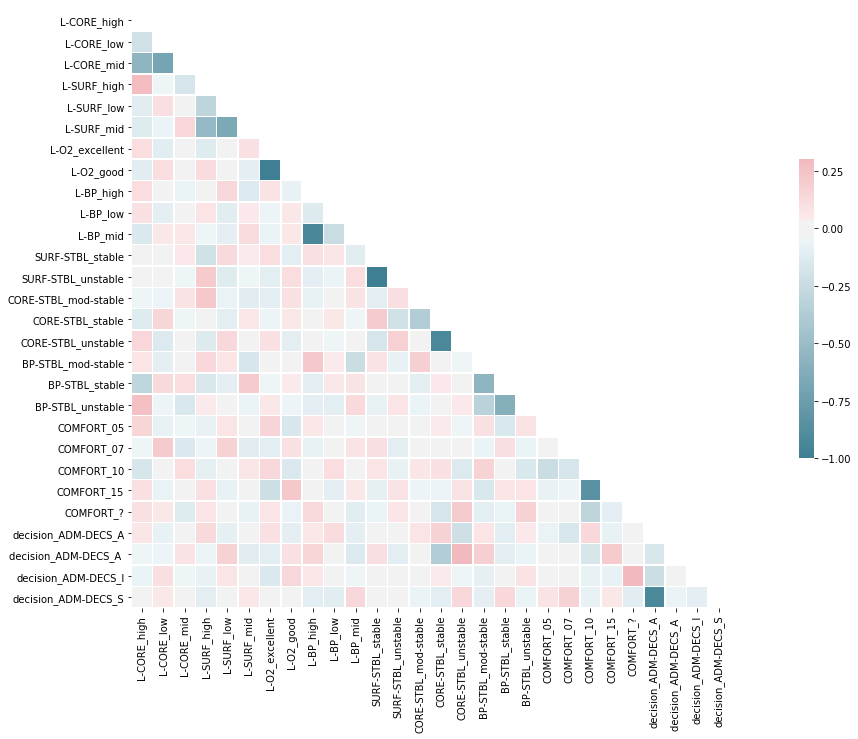

In [18]:
scaler = StandardScaler()
df_corr = pd.DataFrame(scaler.fit_transform(dummy_ds), columns = dummy_ds.columns)
corr = df_corr.corr()

mask = np.zeros_like(corr,dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(25,11))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

# KNeighbors Classifier

In [12]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print('KNeighbors')
kf = KFold(n_splits=4)
d = []
i=0
nNeighborsValues = [1,5,10]
weightValues = ['uniform','distance']
algorithmValues = ['ball_tree', 'kd_tree', 'brute']
leafSizeValues = [5,30]
pValues = [1,2]
nNeighborsA = []
weightA = []
algorithmA = []
leafSizeA = []
pA = []

indiceCol = ['n_neighbors','weights','algorithm','leaf_size','p','Accuracy','DesvEstandar']
ndigits = 5
accuracyKNeigh = []
desvEstAccuracy = []

for n_neigh in nNeighborsValues:
    for w in weightValues:
        for alg in algorithmValues:
            for lf in leafSizeValues:
                for p in pValues:
                    nNeighborsA.append(n_neigh)
                    weightA.append(w)
                    algorithmA.append(alg)
                    leafSizeA.append(lf)
                    pA.append(p)
                    accuracyKNeigh.append([])
                    for train_index, test_index in kf.split(X.loc[:]):
                        X_train = X.iloc[train_index] 
                        X_test = X.iloc[test_index]
                        y_train, y_test = y[train_index], y[test_index]

                        neigh = KNeighborsClassifier(n_neighbors= n_neigh,weights=w,algorithm=alg,leaf_size=lf,p=p)
                        neigh.fit(X_train, y_train) 
                        y_predNeigh = neigh.predict(X_test)
                        accuracyKNeigh[i].append(round(accuracy_score(y_test, y_predNeigh),ndigits))

                    desvEstAccuracy.append(np.std(accuracyKNeigh[i]))
                    i = i+1

indiceReng = np.arange(i)
d = {
    indiceCol[0]: pd.Series(nNeighborsA, index = indiceReng),
    indiceCol[1]: pd.Series(weightA, index = indiceReng),
    indiceCol[2]: pd.Series(algorithmA, index = indiceReng),
    indiceCol[3]: pd.Series(leafSizeA, index = indiceReng),
    indiceCol[4]: pd.Series(pA, index = indiceReng),
    indiceCol[5]: pd.Series(accuracyKNeigh,index = indiceReng),
    indiceCol[6]: pd.Series(desvEstAccuracy,index = indiceReng)
}
pd.DataFrame(d, index=indiceReng, columns=indiceCol)

KNeighbors


,n_neighbors,weights,algorithm,leaf_size,p,Accuracy,DesvEstandar
0,1,uniform,ball_tree,5,1,"[0.47826, 0.47826, 0.63636, 0.63636]",0.079050
1,1,uniform,ball_tree,5,2,"[0.47826, 0.47826, 0.63636, 0.63636]",0.079050
2,1,uniform,ball_tree,30,1,"[0.47826, 0.52174, 0.45455, 0.63636]",0.069891
3,1,uniform,ball_tree,30,2,"[0.47826, 0.52174, 0.45455, 0.63636]",0.069891
4,1,uniform,kd_tree,5,1,"[0.47826, 0.3913, 0.63636, 0.59091]",0.095921
5,1,uniform,kd_tree,5,2,"[0.47826, 0.3913, 0.63636, 0.59091]",0.095921
6,1,uniform,kd_tree,30,1,"[0.47826, 0.52174, 0.5, 0.63636]",0.061014
7,1,uniform,kd_tree,30,2,"[0.47826, 0.52174, 0.5, 0.63636]",0.061014
8,1,uniform,brute,5,1,"[0.47826, 0.56522, 0.45455, 0.68182]",0.089112
9,1,uniform,brute,5,2,"[0.47826, 0.56522, 0.45455, 0.68182]",0.089112


In [68]:
print(min(desvEstAccuracy))
desvEstAccuracy.index(min(desvEstAccuracy))

0.06101391726483394


6

# GaussianNB

In [16]:
print('Gaussian NB')
kf = KFold(n_splits=4)
d = []
i=0
var_smoothingValues = [1e-12,1e-09,1e-05,1e-01,10]
priorsValues =[[0.1,]]

priorsA = []
var_smoothingtA = []

indiceCol = ['var_smoothing','Accuracy','DesvEstandar']
ndigits = 5
accuracyGaussianNB = []
desvEstAccuracyG = []

for prior in priorsA
    for vs in var_smoothingValues:
        priorsA.append(prior)
        var_smoothingtA.append(vs)
        accuracyGaussianNB.append([])
        for train_index, test_index in kf.split(X.loc[:]):
            X_train = X.iloc[train_index] 
            X_test = X.iloc[test_index]
            y_train, y_test = y[train_index], y[test_index]

            gaussian = GaussianNB(var_smoothing = vs)
            gaussian.fit(X_train, y_train)
            y_predGaussian = gaussian.predict(X_test)

            accuracyGaussianNB[i].append(round(accuracy_score(y_test,y_predGaussian),ndigits))

        desvEstAccuracyG.append(np.std(accuracyGaussianNB[i]))
        i = i+1

indiceReng = np.arange(i)
d = {
    indiceCol[0]: pd.Series(var_smoothingtA, index = indiceReng),
    indiceCol[1]: pd.Series(accuracyGaussianNB, index = indiceReng),
    indiceCol[2]: pd.Series(desvEstAccuracyG,index = indiceReng)
}
pd.DataFrame(d, index=indiceReng, columns=indiceCol)
    

Gaussian NB


,var_smoothing,Accuracy,DesvEstandar
0,1.000000e-12,"[0.30435, 0.17391, 0.22727, 0.31818]",0.058669
1,1.000000e-09,"[0.30435, 0.17391, 0.22727, 0.31818]",0.058669
2,1.000000e-05,"[0.3913, 0.17391, 0.36364, 0.31818]",0.083759
3,1.000000e-01,"[0.43478, 0.34783, 0.68182, 0.63636]",0.138313
4,1.000000e+01,"[0.6087, 0.65217, 0.81818, 0.72727]",0.079567


# Modelo elegido

In [97]:
gaussian = GaussianNB(var_smoothing = 10)
gaussian.fit(X_train, y_train)
y_predGaussian = gaussian.predict(X_test)
print('Accuracy score: '+ str(accuracy_score(y_test,y_predGaussian)))

Accuracy score: 0.7272727272727273


In [99]:
neigh = KNeighborsClassifier(n_neighbors= 10,weights='uniform',algorithm='ball_tree',leaf_size=5,p=1)
neigh.fit(X_train, y_train) 
y_pred = neigh.predict(X_test)
print('Accuracy score: '+ str(accuracy_score(y_test,y_pred)))

Accuracy score: 0.7272727272727273


In [100]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[16  0  0]
 [ 1  0  0]
 [ 5  0  0]]
Normalized confusion matrix
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


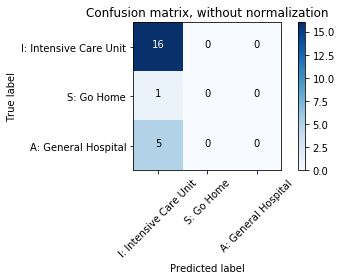

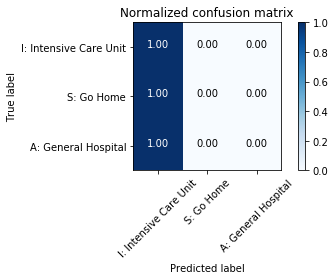

In [102]:
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools

cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['very cheap','affordable','moderate','expensive']
class_names = ['I: Intensive Care Unit','S: Go Home','A: General Hospital']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()


In [103]:
accuracy_score(y_test, y_pred)

0.7272727272727273